In [379]:
import sys
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)
np.set_printoptions(threshold=sys.maxsize)

# Input Parameters

In [380]:
rays     = 1

inc_z    = 1
z        = np.array([3000, 4000, 3000])
velo_i   = np.array([3000, 4500, 6000])
velo_f   = np.array([2200, 3000, 4500])
# z        = np.array([800])
# velo_i   = np.array([3500])
# velo_f   = np.array([2000])
layers   = np.shape(z)[0]

depth = np.zeros([1, layers+1])
for i in range(1, layers + 1):
    depth[0, 0] = 0
    depth[0, i] = depth[0, i - 1] + z[i - 1]
    
    
b        = np.zeros([1, layers])
for i in range(layers):
    b[0, i] = (velo_f[i] - velo_i[i]) / z[i]

dz = np.zeros([1, 1])
for i in range(layers):
    a = np.transpose(np.amax(dz) + np.array([np.arange(1, z[i]+1, inc_z)]))
    dz = np.append(dz, a, axis = 0)

velo = np.zeros([np.shape(dz)[0], 1])
for j in range(layers):
    for i in range(int(depth[0,j]) + 1, int(depth[0,j+1]) + 1):
        velo[i, 0] = velo_i[j] + (dz[i, 0] - depth[0, j]) * b[0, j]
velo[0, 0] = velo_i[0]

In [381]:
theta    = np.zeros([1, rays])
for i in range(0, rays):
    theta[0, i] = (1 + i) * 20

# Ray Parameter

In [382]:
p        = np.zeros([layers, rays])
for j in range(rays):
    for i in range(layers):
        p[i, j] = np.sin(np.deg2rad(theta[0, j])) / velo_f[i]
print("p = \n", p)

pz = np.zeros([np.shape(velo)[0], rays])
for j in range(rays):
    pz[0, j] = np.sqrt((1/(velo[0]))**(2) - (p[0, j])**2)
    for k in range(layers):
        for i in range(int(depth[0, k]) + 1, int(depth[0, k + 1]) + 1):
            pz[i, j] = np.sqrt((1/(velo[i]))**(2) - (p[k, j])**2)

p = 
 [[0.00015546]
 [0.00011401]
 [0.000076  ]]


# Lateral Displacement

In [383]:
dx = np.zeros([np.shape(velo)[0], rays])
for j in range(rays):
    dx[0, j] = p[0, j] * inc_z/ pz[0, j]
    for k in range(layers):
        for i in range(int(depth[0, k]) + 1, int(depth[0, k + 1]) + 1):
            dx[i, j] = p[k, j] * inc_z/ pz[i, j]
        dx_sum = np.sum(dx[:, j])

for j in range(rays):
    for i in range(1, np.shape(dx)[0]):
        dx[i, j] = dx[i, j] + dx[i - 1, j]

dz = np.flip(dz, 0)

# Plotting

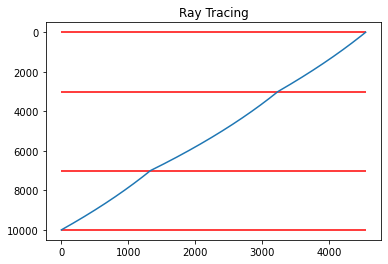

In [384]:
fig, ax = plt.subplots()
for i in range(rays):
    ax.plot(dx[:, i], dz[:, 0])
ax.set_title("Ray Tracing")
for i in range(len(depth)):
    plt.hlines(depth[i], 0, np.amax(dx), colors='r')
plt.gca().invert_yaxis()
# fig.set_size_inches(18.5, 7.5)
# fig.savefig('test.png', dpi=300)
plt.show()